# MonReader

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img
from skimage.io import imread
from skimage.transform import rescale, resize, rotate

I will be attempting to create a neural network that is able to determine whether or not a page is being flipped from a series of images.

In [2]:
## create variables for image locations on computer

train = './images/training'
train_f = './images/training/flip'
train_nf = './images/training/notflip'

test = './images/testing'
test_f = './images/testing/flip'
test_nf = './images/testing/notflip'

In [3]:
print('Number of Training flip pictures: ', len(os.listdir(train_f)))
print('Number of Training not flip pictures: ', len(os.listdir(train_nf)))
print('Number of Testing flip pictures: ', len(os.listdir(test_f)))
print('Number of Testing not flip pictures: ', len(os.listdir(test_nf)))

Number of Training flip pictures:  1162
Number of Training not flip pictures:  1230
Number of Testing flip pictures:  290
Number of Testing not flip pictures:  307


In [4]:
## get image vectors from image files and append them to a list

train_flip = []
train_notflip = []
test_flip = []
test_notflip = []

for img in os.listdir(train_f):
    train_flip.append(imread(f'./images/training/flip/{img}'))
    
for img in os.listdir(train_nf):
    train_notflip.append(imread(f'./images/training/notflip/{img}'))
                                
for img in os.listdir(test_f):
    test_flip.append(imread(f'./images/testing/flip/{img}'))
    
for img in os.listdir(test_nf):
    test_notflip.append(imread(f'./images/testing/notflip/{img}'))

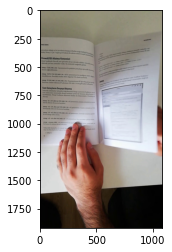

In [5]:
testpic = train_flip[0]
plt.imshow(testpic)

In [6]:
testpic.shape

(1920, 1080, 3)

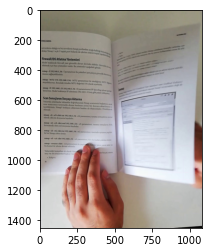

In [7]:
cropped = testpic[100:1550]
plt.imshow(cropped)

In [8]:
cropped.shape

(1450, 1080, 3)

In [9]:
cropped[0]

array([[130, 127, 110],
       [130, 127, 110],
       [131, 128, 111],
       ...,
       [155, 147, 134],
       [156, 148, 135],
       [156, 148, 135]], dtype=uint8)

In [10]:
train_flip_test = [rescale(x[100:1550], 0.25, multichannel=True) for x in train_flip]
train_notflip_test = [rescale(x[100:1550], 0.25, multichannel=True) for x in train_flip]

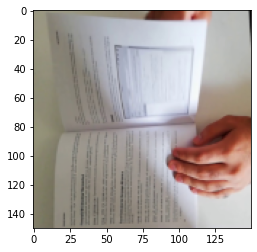

In [20]:
plt.imshow(rotate(resize(rescale(cropped, 0.25, multichannel=True), (150, 150)), 90))

In [12]:
train_flip = [resize(rescale(x[100:1550], 0.25, multichannel=True), (150, 150)) for x in train_flip]
train_notflip = [resize(rescale(x[100:1550], 0.25, multichannel=True), (150, 150)) for x in train_notflip]

In [21]:
train_flip = [rotate(x, 90) for x in train_flip]
train_notflip = [rotate(x, 90) for x in train_notflip]

In [ ]:
test_flip = [resize(x, (150, 150)) for x in test_flip]
test_notflip = [resize(x, (150, 150)) for x in test_notflip]

In [22]:
training_data = []
testing_data = []

for label in [train_notflip, train_flip]:
    for img in label:
        if label == train_notflip:
            training_data.append([img, 0])
        else:
            training_data.append([img, 1])

for label in [test_notflip, test_flip]:
    for img in label:
        if label == test_notflip:
            testing_data.append([img, 0])
        else:
            testing_data.append([img, 1])

In [23]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [24]:
X_train, X_test, y_train, y_test = [], [], [], []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
    
X_train = np.array(X_train)
X_test = np.array(X_test)
    
y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
from tensorflow.keras.applications import * #Efficient Net included here
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers
import tensorflow as tf

In [26]:
conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D())
#avoid overfitting
model.add(layers.Dropout(rate=0.2))
# Set NUMBER_OF_CLASSES to the number of your final predictions.
model.add(layers.Dense(1, activation="sigmoid"))
conv_base.trainable = True

In [27]:
X_train[0].shape

(150, 150, 3)

In [28]:
model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=["acc"],
)

In [29]:
model.fit(np.array(X_train), y_train, epochs=15)

Epoch 1/20
 3/75 [>.............................] - ETA: 1:54 - loss: 1.5418 - acc: 0.5833

KeyboardInterrupt: 

In [45]:
enet_train = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model_train = models.Sequential()
model_train.add(enet_train)
model_train.add(layers.GlobalMaxPooling2D())
model_train.add(layers.Dropout(0.3))
model_train.add(layers.Dense(1, activation='sigmoid'))
enet_train.trainable=True

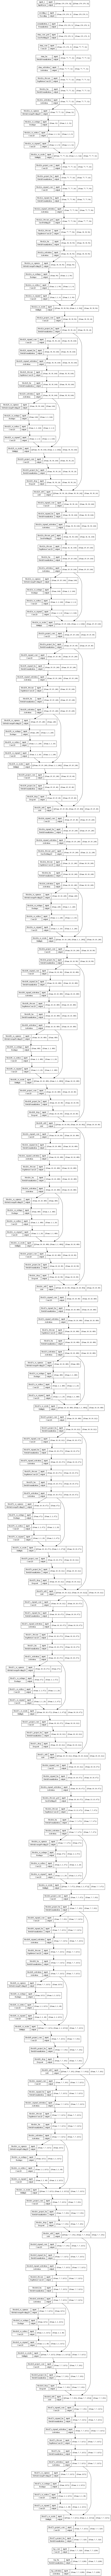

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(enet_train, to_file='conv_base.png', show_shapes=True)
from IPython.display import Image
Image(filename='conv_base.png') 

In [48]:
set_trainable = False
for layer in enet_train.layers:
    if layer.name == 'block3b_add':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [49]:
model_train.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 global_max_pooling2d_3 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 3,943,099
Non-trainable params: 107,753
_________________________________________________________________


In [50]:
model_train.compile(loss='binary_crossentropy', 
                    optimizer='adam', 
                    metrics=['acc'])

In [51]:
model_train.fit(np.array(X_train), y_train, epochs=20)

Epoch 1/20
75/75 [==============================] - 73s 880ms/step - loss: 1.6153 - acc: 0.5188
Epoch 2/20
75/75 [==============================] - 66s 878ms/step - loss: 0.9058 - acc: 0.5962
Epoch 3/20
75/75 [==============================] - 66s 879ms/step - loss: 0.6862 - acc: 0.6622
Epoch 4/20
75/75 [==============================] - 66s 880ms/step - loss: 0.4931 - acc: 0.7642
Epoch 5/20
75/75 [==============================] - 66s 879ms/step - loss: 0.4180 - acc: 0.8081
Epoch 6/20
75/75 [==============================] - 68s 903ms/step - loss: 0.3272 - acc: 0.8537
Epoch 7/20
75/75 [==============================] - 66s 882ms/step - loss: 0.2864 - acc: 0.8645
Epoch 8/20
75/75 [==============================] - 67s 896ms/step - loss: 0.2357 - acc: 0.8913
Epoch 9/20
75/75 [==============================] - 66s 884ms/step - loss: 0.1729 - acc: 0.9160
Epoch 10/20
75/75 [==============================] - 67s 888ms/step - loss: 0.2061 - acc: 0.9030
Epoch 11/20
75/75 [====================

In [56]:
X_test = [resize(x, (150, 150)) for x in X_test]

In [57]:
model_train.evaluate(np.array(X_test), y_test)

19/19 [==============================] - 9s 390ms/step - loss: 1.1723 - acc: 0.5611


[1.1723387241363525, 0.5611390471458435]

# TEST

In [ ]:
efficientNet

In [131]:
resize(testpic, (240, 240))[13:190].shape

(177, 240, 3)

In [114]:
testpic.shape[:2]

(1920, 1080)

In [115]:
x, y = testpic.shape[:2]
print(x)
print(y)

1920
1080


In [185]:
240-48

192

In [304]:
train_generator = ImageDataGenerator(rescale=1./255,                                     
                                     zoom_range=.1, 
                                     shear_range=.1,
                                     height_shift_range=[0, 20],
                                     horizontal_flip=True,
                                     rotation_range=180).flow_from_directory(
                    train,
                    target_size=(240, 240),
                    batch_size=32,
                    class_mode='binary')

Found 2392 images belonging to 2 classes.


In [305]:
train_images, train_labels = next(train_generator)

In [289]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                 test,
                 target_size=(240, 240),
                 batch_size=597,
                 class_mode='binary')

Found 597 images belonging to 2 classes.


In [69]:
test_images, test_labels = next(test_generator)
y_test = np.reshape(test_labels, (597, 1))

In [306]:
flip = []
notflip = []

for num in range(25):
    if train_labels[num] == 0:
        flip.append(train_images[num]) 
    else:
        notflip.append(train_images[num])

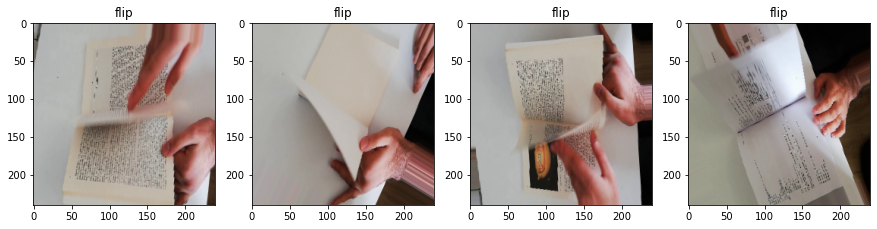

In [307]:
plt.figure(figsize=(15, 6))
for n in range(4):
    plt.subplot(1, 4, n+1)
    plt.title('flip')
    plt.imshow(flip[n]);

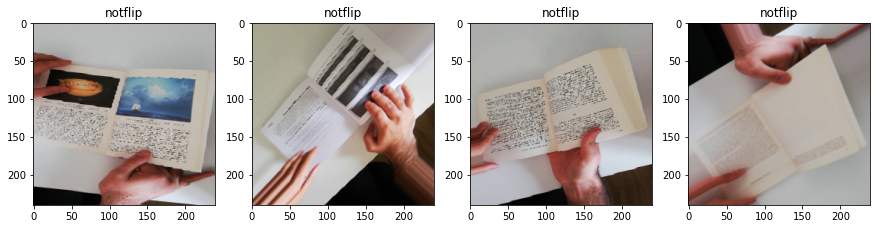

In [308]:
plt.figure(figsize=(15, 6))
for n in range(4):
    plt.subplot(1, 4, n+1)
    plt.title('notflip')
    plt.imshow(notflip[n+3]);

In [15]:
enetb6 = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

model = models.Sequential()
model.add(enetb6)
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
enetb6.trainable = False

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [22]:
model.fit_generator(train_generator,
                    steps_per_epoch=75,
                    epochs=20)

C:\Users\Chris\AppData\Local\Temp/ipykernel_19524/2531297495.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/20
75/75 [==============================] - 193s 2s/step - loss: 2.8616 - acc: 0.5134
Epoch 2/20
75/75 [==============================] - 182s 2s/step - loss: 2.5990 - acc: 0.4916
Epoch 3/20
75/75 [==============================] - 182s 2s/step - loss: 2.2322 - acc: 0.5192
Epoch 4/20
75/75 [==============================] - 180s 2s/step - loss: 2.2697 - acc: 0.4933
Epoch 5/20
75/75 [==============================] - 180s 2s/step - loss: 2.0551 - acc: 0.4933
Epoch 6/20
75/75 [==============================] - 180s 2s/step - loss: 2.1999 - acc: 0.5075
Epoch 7/20
75/75 [==============================] - 181s 2s/step - loss: 1.7547 - acc: 0.5092
Epoch 8/20
75/75 [==============================] - 181s 2s/step - loss: 1.7688 - acc: 0.4983
Epoch 9/20
75/75 [==============================] - 180s 2s/step - loss: 1.5723 - acc: 0.4979
Epoch 10/20
75/75 [==============================] - 180s 2s/step - loss: 1.4905 - acc: 0.5021
Epoch 11/20
75/75 [==============================] - 180s 2

In [309]:
enet_train = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

model_train = models.Sequential()
model_train.add(enet_train)
model_train.add(layers.GlobalMaxPooling2D())
model_train.add(layers.Dropout(0.3))
model_train.add(layers.Dense(1, activation='sigmoid'))
enet_train.trainable=True

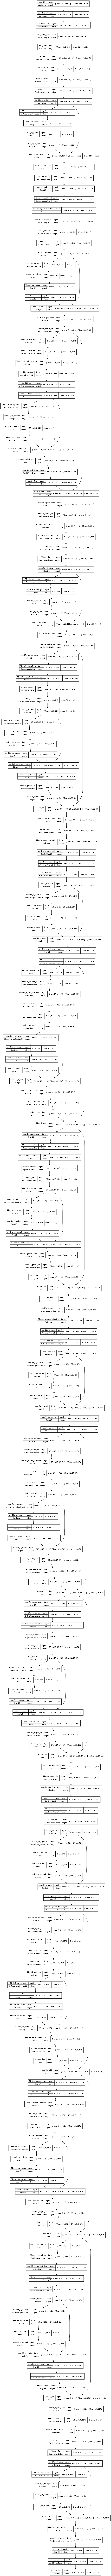

In [210]:
from tensorflow.keras.utils import plot_model
plot_model(enet_train, to_file='conv_base.png', show_shapes=True)
from IPython.display import Image
Image(filename='conv_base.png') 

In [310]:
set_trainable = False
for layer in enet_train.layers:
    if layer.name == 'block2a_project_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [311]:
model_train.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 global_max_pooling2d_26 (Gl  (None, 1280)             0         
 obalMaxPooling2D)                                               
                                                                 
 dropout_26 (Dropout)        (None, 1280)              0         
                                                                 
 dense_26 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,002,801
Non-trainable params: 48,051
_________________________________________________________________


In [312]:
model_train.compile(loss='binary_crossentropy', 
                    optimizer='adam', 
                    metrics=['acc'])

In [313]:
model_train.fit(train_generator,
                steps_per_epoch=75,
                epochs=15)

C:\Users\Chris\AppData\Local\Temp/ipykernel_19524/2667981781.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train.fit_generator(train_generator,


Epoch 1/20
75/75 [==============================] - 232s 3s/step - loss: 1.1687 - acc: 0.6931
Epoch 2/20
75/75 [==============================] - 230s 3s/step - loss: 0.6388 - acc: 0.7793
Epoch 3/20
75/75 [==============================] - 216s 3s/step - loss: 0.3840 - acc: 0.8750
Epoch 4/20
75/75 [==============================] - 217s 3s/step - loss: 0.2498 - acc: 0.9009
Epoch 5/20
75/75 [==============================] - 217s 3s/step - loss: 0.1490 - acc: 0.9411
Epoch 6/20
75/75 [==============================] - 216s 3s/step - loss: 0.1350 - acc: 0.9536
Epoch 7/20
75/75 [==============================] - 215s 3s/step - loss: 0.1110 - acc: 0.9574
Epoch 8/20
75/75 [==============================] - 216s 3s/step - loss: 0.1218 - acc: 0.9557
Epoch 9/20
75/75 [==============================] - 216s 3s/step - loss: 0.0840 - acc: 0.9695
Epoch 10/20
75/75 [==============================] - 216s 3s/step - loss: 0.0893 - acc: 0.9657
Epoch 11/20
75/75 [==============================] - 215s 3

In [271]:
model_train.evaluate(test_images, y_test)

19/19 [==============================] - 18s 874ms/step - loss: 0.7003 - acc: 0.4740


[0.7002865076065063, 0.47403684258461]

In [48]:
model_train.save('EnetB6_model')

INFO:tensorflow:Assets written to: EnetB6_model\assets
